In [5]:
import torch
import torch.nn as nn
import time

In [6]:
from src.datasources.unityeyes import UnityEyesDataset
from src.configs import cfg
import src.models.gaze_hrnet as gaze_hrnet

In [7]:
dataset_path = 'E:/Datasets/UnityEyes_Windows/640x480/val'
u_dataset = UnityEyesDataset(dataset_path, cfg, random_difficulty=True, generate_heatmaps=True)
print(u_dataset.__len__())

231232


In [8]:
from torch.utils.data import DataLoader
u_dataloader = DataLoader(u_dataset, shuffle=True, batch_size=32, num_workers=1)

In [9]:
start = time.perf_counter()
for one_batch in u_dataloader:
    u_onebatch = one_batch
    break
print(time.perf_counter() - start)

3.329643899999951


tensor([-0.0337, -0.3464])
tensor([[ 31.8732,  38.3533],
        [ 44.6984,  16.9021],
        [ 85.3804,   7.4451],
        [103.8097,  22.4802],
        [101.8137,  38.4958],
        [101.2879,  53.7367],
        [ 83.6152,  59.0892],
        [ 48.1800,  53.2491],
        [ 42.6843,  34.9760],
        [ 50.3129,  17.1572],
        [ 67.5018,  10.1354],
        [ 84.1821,  18.0239],
        [ 90.5825,  36.2017],
        [ 82.9539,  54.0206],
        [ 65.7650,  61.0425],
        [ 49.0848,  53.1539],
        [ 68.5199,  35.7747],
        [ 49.8440,  33.9198]])
tensor(55.0438)


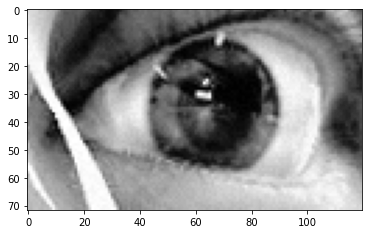

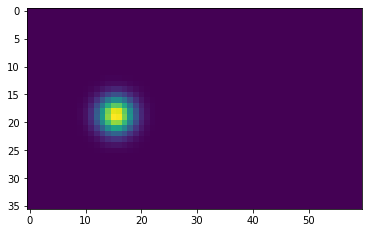

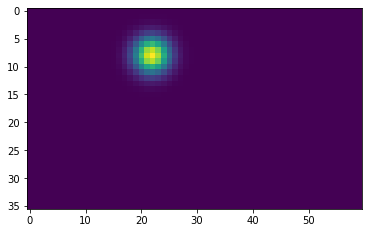

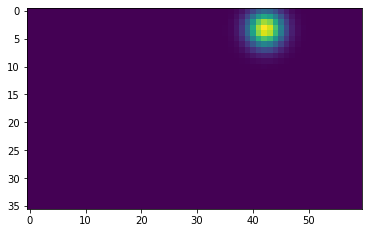

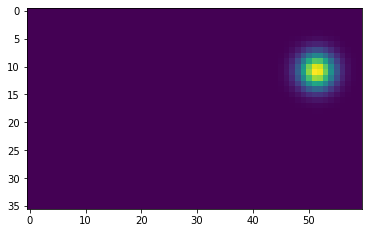

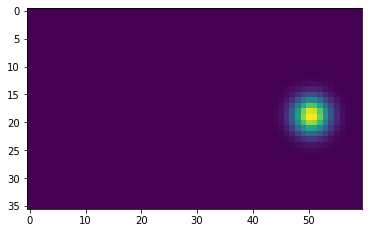

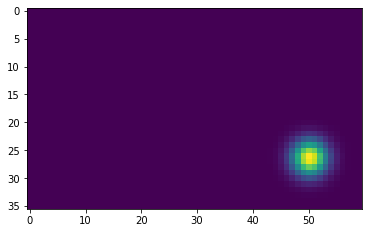

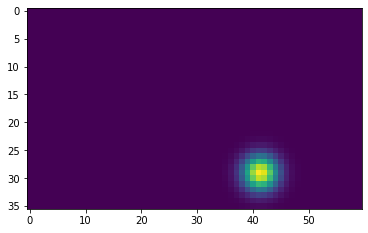

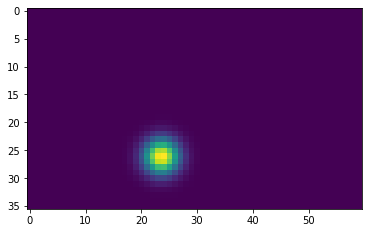

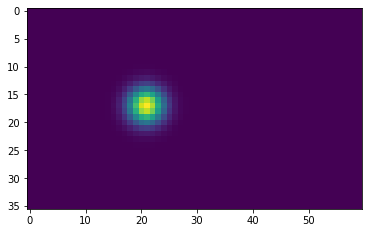

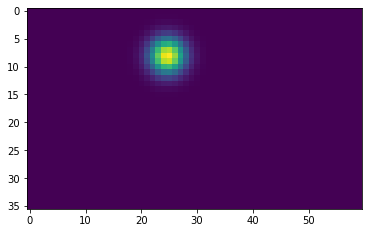

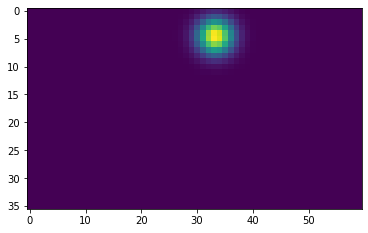

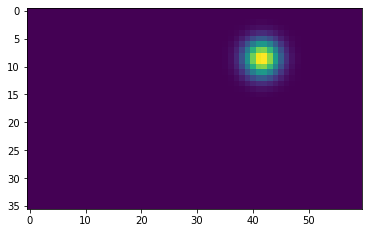

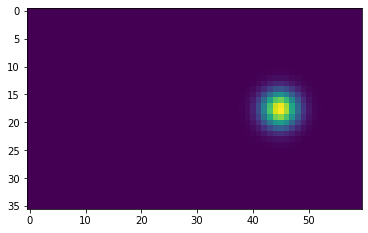

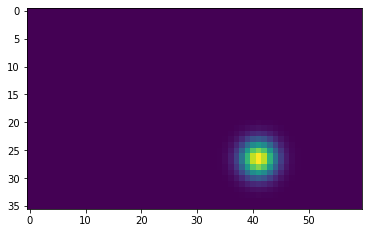

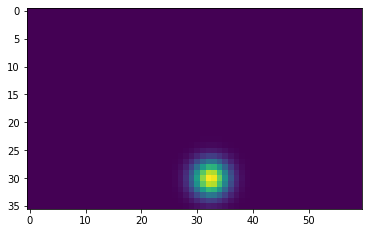

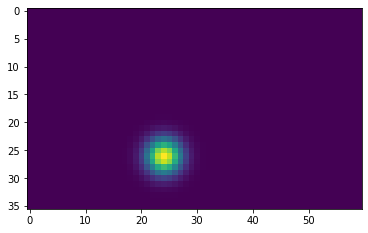

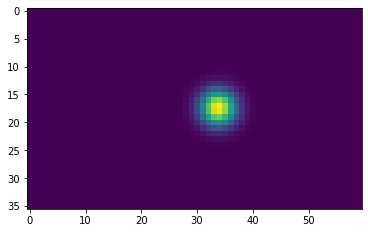

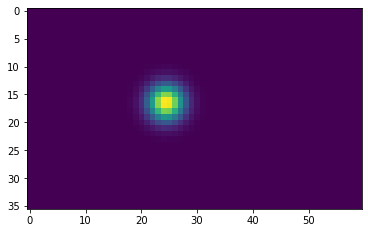

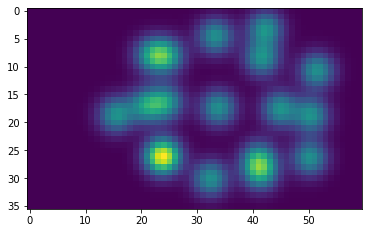

In [10]:
import matplotlib.pyplot as plt 
plt.figure()
plt.imshow(u_onebatch['eye'][0][0], cmap='gray')
heatmap = torch.zeros((36, 60))
for i in range(18):
    heatmap += u_onebatch['heatmaps'][0][i]
    plt.figure()
    plt.imshow(u_onebatch['heatmaps'][0][i])
plt.figure()
plt.imshow(heatmap)
print(u_onebatch['gaze'][0])
print(u_onebatch['landmarks'][0])
print(u_onebatch['radius'][0])

In [11]:
g = gaze_hrnet.get_gaze_net(cfg, True)
g

GazeHighResolutionNet(
  (conv1): Conv2d(1, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(i